<a href="https://colab.research.google.com/github/Aashish0330/task5-EDA-IPL/blob/main/TASK_5_EDA_IPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sparks Foundation

Name : Sai Aashish Pokuri

### EDA - Indian Premier League

Problem Statements



1.   As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
2.  Suggest teams or players a company should endorse for its products





## Import Libraries

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import Dataset

In [ ]:
matches_df = pd.read_csv("matches.csv",index_col='id', parse_dates=['date'])
score_df = pd.read_csv("deliveries.csv")

In [ ]:
matches_df.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
score_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2.0,2.0,NaN,NaN,NaN


## Description of the Data

In [ ]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 1 to 11415
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   season           756 non-null    int64         
 1   city             749 non-null    object        
 2   date             756 non-null    datetime64[ns]
 3   team1            756 non-null    object        
 4   team2            756 non-null    object        
 5   toss_winner      756 non-null    object        
 6   toss_decision    756 non-null    object        
 7   result           756 non-null    object        
 8   dl_applied       756 non-null    int64         
 9   winner           752 non-null    object        
 10  win_by_runs      756 non-null    int64         
 11  win_by_wickets   756 non-null    int64         
 12  player_of_match  752 non-null    object        
 13  venue            756 non-null    object        
 14  umpire1          754 non-null    object 

In [ ]:
score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103401 entries, 0 to 103400
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          103401 non-null  int64  
 1   inning            103401 non-null  int64  
 2   batting_team      103401 non-null  object 
 3   bowling_team      103401 non-null  object 
 4   over              103401 non-null  int64  
 5   ball              103401 non-null  int64  
 6   batsman           103401 non-null  object 
 7   non_striker       103401 non-null  object 
 8   bowler            103401 non-null  object 
 9   is_super_over     103401 non-null  int64  
 10  wide_runs         103401 non-null  int64  
 11  bye_runs          103401 non-null  int64  
 12  legbye_runs       103401 non-null  int64  
 13  noball_runs       103401 non-null  int64  
 14  penalty_runs      103401 non-null  int64  
 15  batsman_runs      103401 non-null  int64  
 16  extra_runs        10

In [ ]:
matches_df.describe()

,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,2013.444444,0.025132,13.283069,3.350529
std,3.366895,0.156630,23.471144,3.387963
min,2008.000000,0.000000,0.000000,0.000000
25%,2011.000000,0.000000,0.000000,0.000000
50%,2013.000000,0.000000,0.000000,4.000000
75%,2016.000000,0.000000,19.000000,6.000000
max,2019.000000,1.000000,146.000000,10.000000


In [ ]:
score_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,103401.000000,103401.000000,103401.000000,103401.000000,103401.000000,103401.000000,103401.000000,103401.000000,103401.000000,103401.000000,103401.000000,103400.000000,103400.000000
mean,219.250868,1.482336,10.138558,3.617818,0.000561,0.037824,0.005242,0.022398,0.004603,0.000048,1.206188,0.070116,1.276306
std,125.801119,0.501892,5.672546,1.808659,0.023677,0.258905,0.118058,0.200051,0.074494,0.015549,1.581512,0.351919,1.570788
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,111.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,219.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,329.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,436.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,5.000000,7.000000


In [ ]:
#Seasons in the dataset
matches_df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

## Wins and Losses

In [ ]:
matches_df['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [ ]:
matches_df[matches_df['result'] == 'tie']

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN
126,2009,Cape Town,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands,MR Benson,M Erasmus,NaN
190,2010,Chennai,2010-03-21,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,tie,0,Kings XI Punjab,0,0,J Theron,"MA Chidambaram Stadium, Chepauk",K Hariharan,DJ Harper,NaN
388,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi,NaN
401,2013,Bangalore,2013-04-16,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,tie,0,Royal Challengers Bangalore,0,0,V Kohli,M Chinnaswamy Stadium,M Erasmus,VA Kulkarni,NaN
476,2014,Abu Dhabi,2014-04-29,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary,NaN
536,2015,Ahmedabad,2015-04-21,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,tie,0,Kings XI Punjab,0,0,SE Marsh,"Sardar Patel Stadium, Motera",M Erasmus,S Ravi,NaN
11146,2019,Delhi,2019-03-30,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,tie,0,Delhi Capitals,0,0,P Shaw,Feroz Shah Kotla Ground,Anil Dandekar,Nitin Menon,Marais Erasmus
11342,2019,Mumbai,2019-02-05,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,tie,0,Mumbai Indians,0,0,JJ Bumrah,Wankhede Stadium,S Ravi,O Nandan,Nanda Kishore


In [ ]:
matches_df[matches_df['result'] == 'no result']

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
11340,2019,Bengaluru,2019-04-30,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [ ]:
#Match with no result
matches_df['winner'].isnull().sum()

4

In [ ]:
winslost = matches_df[['team1', 'team2', 'winner']]
winslost.head()

,team1,team2,winner
id,,,
1,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
2,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant
3,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders
4,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab
5,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore


### Data Analysis and Visualization

In [ ]:
pd.options.mode.chained_assignment = None
winslost['looser'] = winslost.apply(lambda x: (x['team2'] if x['team1'] == x['winner'] else x['team1']), axis = 1)
winslost.head(7)

,team1,team2,winner,looser
id,,,,
1,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore
2,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,Mumbai Indians
3,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,Gujarat Lions
4,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,Rising Pune Supergiant
5,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,Delhi Daredevils
6,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,Gujarat Lions
7,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,Kolkata Knight Riders


In [ ]:
#Number of wins for each team
winslost['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [ ]:
#Number of losses for each team
winslost['looser'].value_counts()

Royal Challengers Bangalore    95
Delhi Daredevils               94
Kings XI Punjab                94
Kolkata Knight Riders          86
Mumbai Indians                 78
Rajasthan Royals               70
Chennai Super Kings            64
Sunrisers Hyderabad            50
Deccan Chargers                46
Pune Warriors                  33
Gujarat Lions                  17
Rising Pune Supergiants         9
Kochi Tuskers Kerala            8
Rising Pune Supergiant          6
Delhi Capitals                  6
Name: looser, dtype: int64

Team won by Maximum Runs

In [ ]:
matches_df.loc[matches_df['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

Team won by Minimum Runs

In [ ]:
matches_df.loc[matches_df['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

Team won by Minimum Runs

In [ ]:
matches_df.loc[matches_df[matches_df['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

Team won by Minimum Wickets

In [ ]:
matches_df.loc[matches_df[matches_df['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['winner']

'Kolkata Knight Riders'

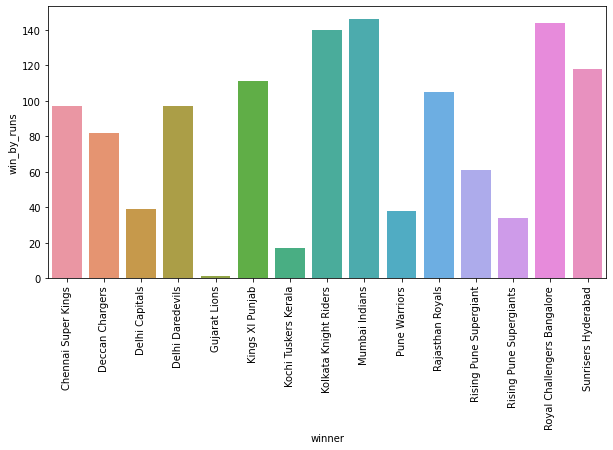

In [ ]:
win_max=matches_df.groupby(['winner'],as_index=False)['win_by_runs'].max()
plt.subplots(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(x=win_max['winner'],y=win_max['win_by_runs'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

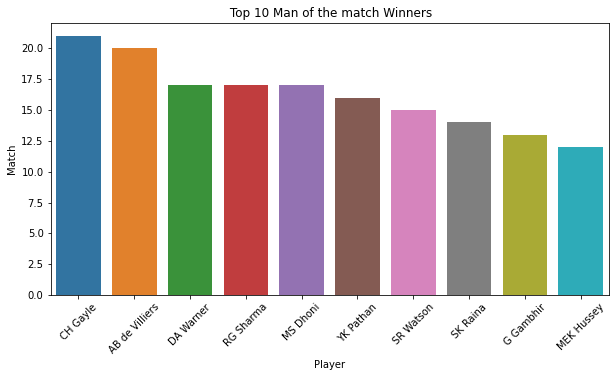

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x=matches_df.player_of_match.value_counts()[:10].index,y= matches_df.player_of_match.value_counts()[:10])
plt.title(' Top 10 Man of the match Winners')
plt.xlabel('Player')
plt.ylabel('Match')
plt.xticks(rotation = 45)

Number of Wins based on Toss

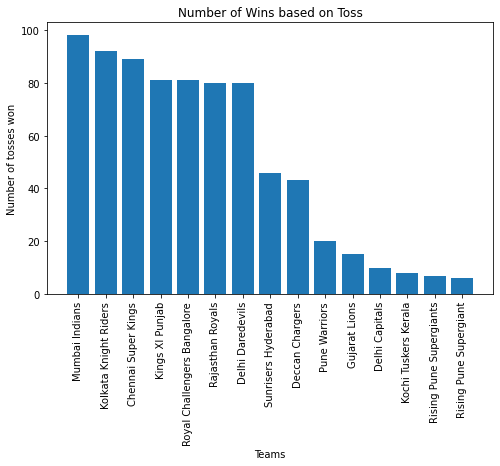

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(list(matches_df['toss_winner'].value_counts().keys()),list(matches_df['toss_winner'].value_counts()))
plt.xlabel('Teams')
plt.ylabel('Number of tosses won')
plt.title('Number of Wins based on Toss')
plt.xticks(rotation = 90)
plt.show()

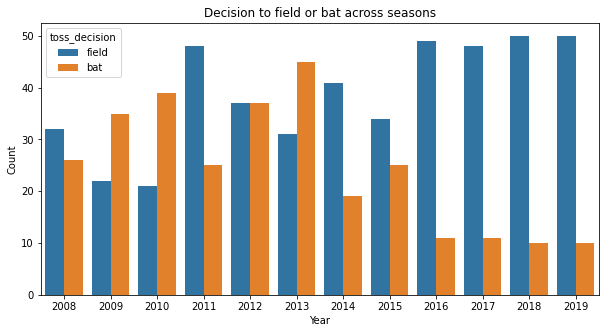

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=matches_df['season'].sort_values(), hue = matches_df['toss_decision'])
plt.title("Decision to field or bat across seasons")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

The Team fielding first wins the match in almost all the seasons

### Matches Hosted in Each City

In [ ]:
city = matches_df['city'].value_counts()

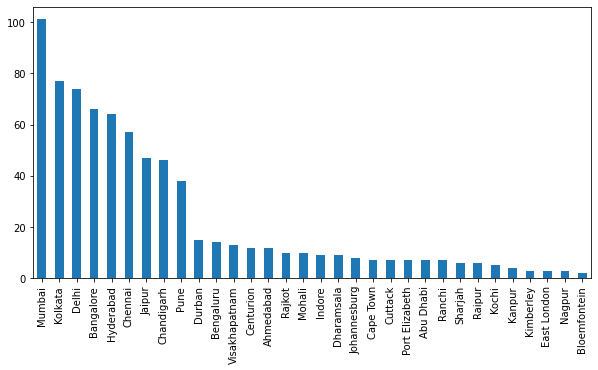

In [ ]:
city.plot(kind = 'bar',figsize=(10,5))

### Analysis and Visualization on Deliveries Dataset

In [ ]:
deliveries_df = pd.read_csv('deliveries.csv', index_col='match_id')
deliveries_df.head()

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
match_id,,,,,,,,,,,,,,,,,,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


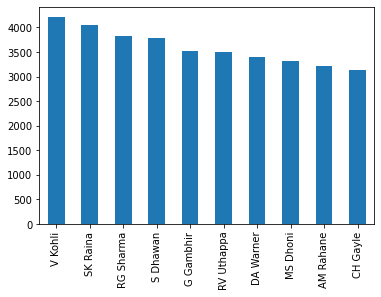

In [ ]:
#top 10 batsmen who have faced several deliveries
deliveries_df['batsman'].value_counts()[:10].plot(kind = 'bar')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

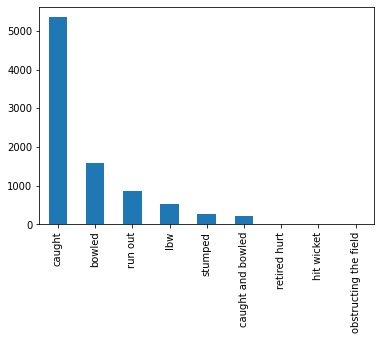

In [ ]:
#kind of dismissal
deliveries_df['dismissal_kind'].value_counts().plot(kind='bar')
plt.xticks(rotation = 90)

In [ ]:
runs = deliveries_df.groupby('batting_team').sum()[['batsman_runs', 'total_runs']]
runs

,batsman_runs,total_runs
batting_team,,
Chennai Super Kings,25104,26418
Deccan Chargers,10885,11463
Delhi Capitals,2530,2630
Delhi Daredevils,23115,24388
Gujarat Lions,4629,4862
Kings XI Punjab,26468,27893
Kochi Tuskers Kerala,1758,1901
Kolkata Knight Riders,25895,27419
Mumbai Indians,28164,29809


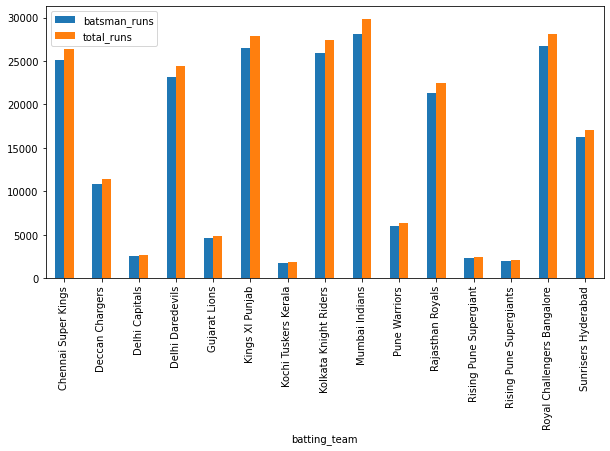

In [ ]:
runs.plot(kind='bar',figsize=(10,5))

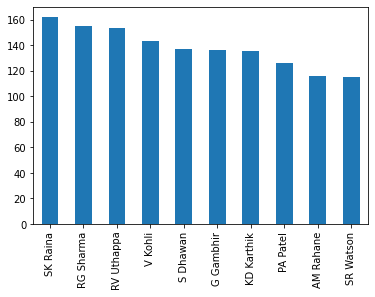

In [ ]:
#players who have been dismissed the most
deliveries_df['player_dismissed'].value_counts()[:10].plot(kind = 'bar')

### Conclusion




1.  Chennai Super Kings and Mumbai Indians are the successful teams.
2.  Chris Gayle and AB Deviliers are best players to bid for.
3.  Many factors depend on the win for a team like toss,team and player performances





